# Đồ Án Cuối Kỳ - Phương pháp số cho Khoa học Dữ Liệu

| MSSV     | Họ và Tên
| -------- | --------
| 21110259 | Lê Quốc Đạt
| 21110297 | Đào Huy Hoàng
| 21280084 | Đặng Thị Kim Anh
| 21280085 | Lê Hồ Hoàng Anh
| 21280098 | Nguyễn Phúc Loan    

### Data description:

- Đây là bộ data thực tế của các thành viên nhóm được chụp lại với từng thành viên:
1. Training data: Với 5 người với 5 folder (từ s1 đến s5). Mỗi folder gồm 5 bức ảnh của tửng thành viên của nhóm. Đây sẽ là data cần xử lý qua PCA để thực hiện nhận diện khuôn mặt
2. Test data: Với 5 người cho 5 folder (từ s1 đến s5). Với mỗi người gồm 2 bức ảnh để kiểm tra và đối chiếu với bộ data training

### Các bước làm:

1. Load library and path dataset:

- Import các thư viện cần thiết như matplotlib, numpy, os và kết nối tới Google Drive để truy cập dữ liệu.
Loading Training Images:

- Khởi tạo một mảng để lưu trữ các hình ảnh đào tạo đã được phẳng hóa.
Duyệt qua các thư mục chứa hình ảnh đào tạo, đọc từng hình ảnh, phẳng hóa chúng và lưu vào mảng training_tensor.
- Hiển thị các hình ảnh đào tạo.
2. Loading Test Images:

- Khởi tạo một mảng để lưu trữ các hình ảnh kiểm tra đã được phẳng hóa.
- Duyệt qua các thư mục chứa hình ảnh kiểm tra, đọc từng hình ảnh, phẳng hóa chúng và lưu vào mảng testing_tensor.
- Hiển thị các hình ảnh kiểm tra.
3. Mean Calculation and Normalization:

- Tính toán khuôn mặt trung bình từ các hình ảnh đào tạo.
- Hiển thị khuôn mặt trung bình.
- Chuẩn hóa tập dữ liệu đào tạo bằng cách trừ đi khuôn mặt trung bình.
4. Covariance Matrix Calculation:

- Tính toán ma trận hiệp phương sai của tensor đào tạo đã được chuẩn hóa.
5. Eigenvalues and Eigenvectors Calculation:

- Tính toán các giá trị riêng và vector riêng của ma trận hiệp phương sai.
- Sắp xếp các cặp giá trị riêng và vector riêng theo thứ tự giảm dần của giá trị riêng.
6. Determine Number of Components for Variance Retention:

- Tính toán tỷ lệ tích lũy của phương sai được giải thích bởi từng thành phần chính.
- Xác định số lượng thành phần cần thiết để giữ lại ít nhất 85% phương sai.
7. Calculate Eigenfaces and Project Training Data:

- Chọn các vector riêng dựa trên số lượng thành phần đã xác định.
- Chiếu dữ liệu đào tạo đã chuẩn hóa lên các mặt eigen (eigenfaces).
8. Signature of Each Face:

- Tính toán đặc trưng của mỗi khuôn mặt trong không gian eigen bằng cách chiếu dữ liệu đào tạo đã chuẩn hóa lên các eigenfaces.
9. Face Recognition:

- Duyệt qua các hình ảnh kiểm tra, chuẩn hóa chúng và chiếu lên không gian eigen.
- So sánh các chữ ký của khuôn mặt kiểm tra với các chữ ký của khuôn mặt đã biết để nhận diện khuôn mặt.
10. Plotting of Accuracy vs k-value for eigenvectors:

- Tính toán độ chính xác của hệ thống với từng giá trị k khác nhau của eigenvectors.
- Vẽ đồ thị độ chính xác so với số lượng eigenvectors.

## Load library and path dataset

In [1]:
# Import necessary libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path to the dataset directory
dataset_path = '/content/drive/MyDrive/Colab Notebooks/PPS/Datasets/'

# Kích thước mục tiêu
target_width = 800
target_height = 920

## Loading Training Images

Train Images:
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)
Processed image shape: (920, 800)


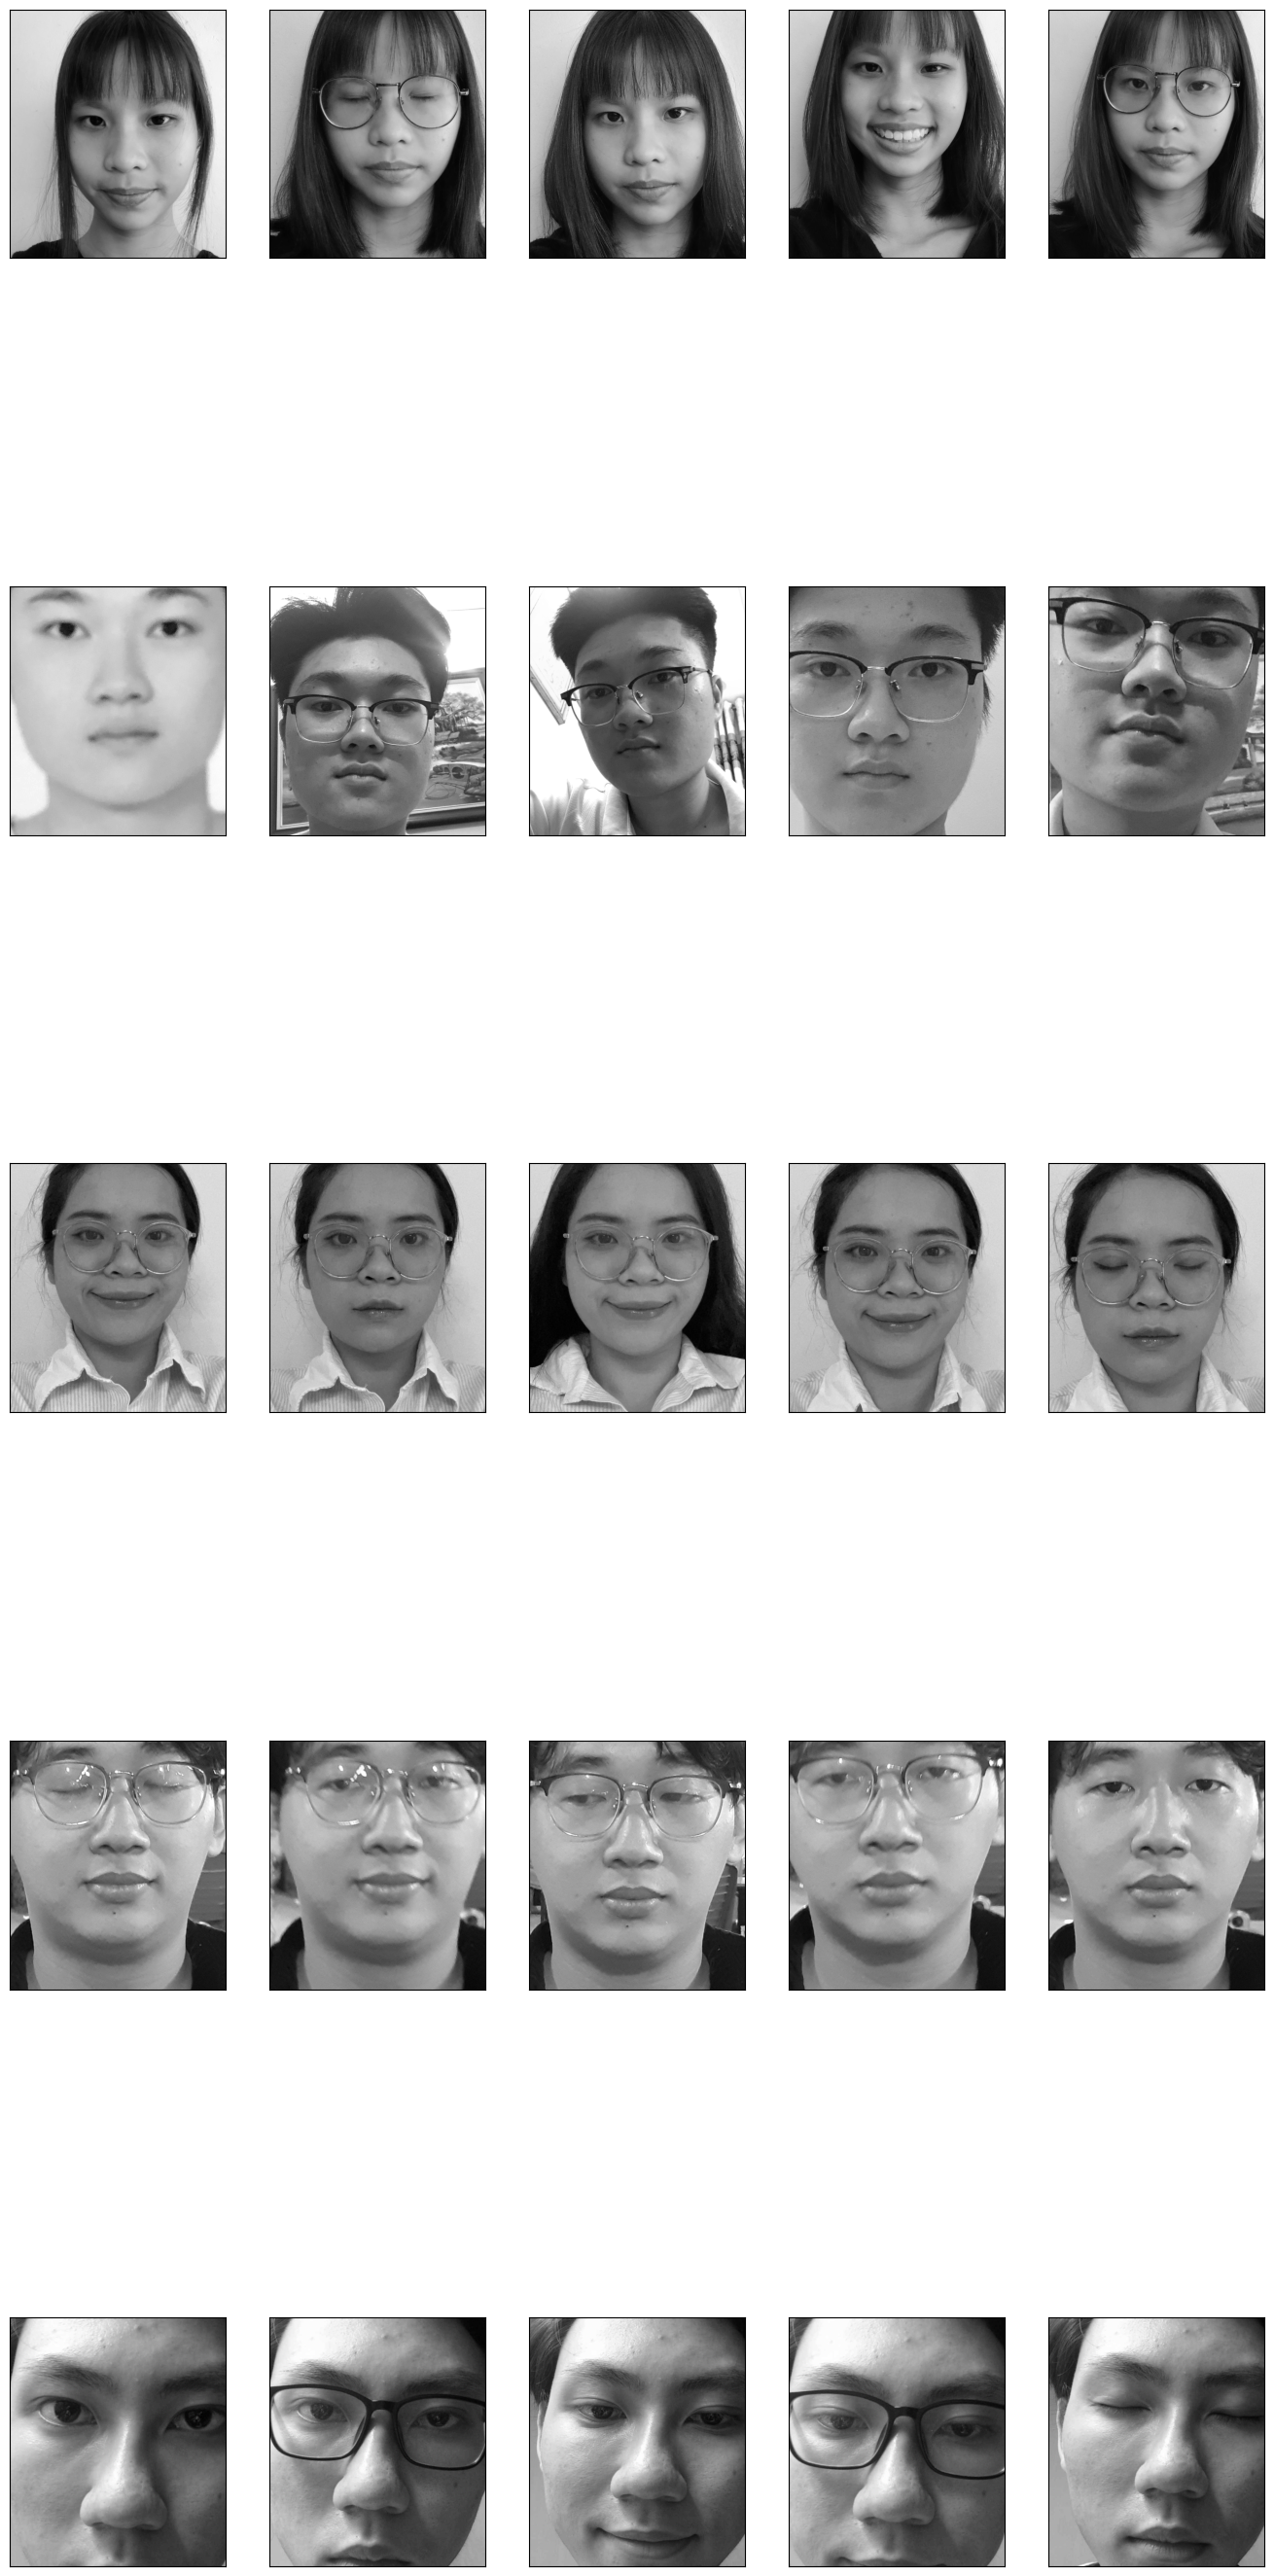

In [4]:
# Define the function to process an image
def process_image(image_path, target_width, target_height):
    # Read the image
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Crop the image (if necessary)
    h, w = img_gray.shape
    left = (w - target_width) // 2
    top = (h - target_height) // 2
    img_cropped = img_gray[top:top + target_height, left:left + target_width]

    # Resize the image
    img_resized = cv2.resize(img_cropped, (target_width, target_height))
    return img_resized

# Initialize an array to store flattened training images
training_tensor = np.ndarray(shape=(25, target_height * target_width), dtype=np.float64)

print('Train Images:')
# Create a figure to display the training images
fig = plt.figure(figsize=(12, 12))

# Loop through each subject (s1 to s5) and each image (1.jpg to 3.jpg)
for i in range(5):
    for j in range(5):
        # Path to the current training image
        img_path = os.path.join(dataset_path, 'training', f's{i+1}', f'{j+1}.jpg')
        # Process the image
        img = process_image(img_path, target_width, target_height)

        # Verify the dimensions of the processed image
        print(f'Processed image shape: {img.shape}')

        # Flatten and store the image data in the training tensor
        training_tensor[i * 5 + j, :] = np.array(img, dtype='float64').flatten()

        # Display the current image
        plt.subplot(5, 5, i * 5 + j + 1)
        plt.imshow(img, cmap='gray')
        plt.tick_params(labelleft=False, labelbottom=False, bottom=False, top=False, right=False, left=False, which='both')
        plt.subplots_adjust(right=1.2, top=2.5)  # Adjust subplot parameters for spacing

plt.show()


## Loading Test Images

Test Images:
Processing image: /content/drive/MyDrive/Colab Notebooks/PPS/Datasets/test/s1/1.jpg
Processing image: /content/drive/MyDrive/Colab Notebooks/PPS/Datasets/test/s1/2.jpg
Processing image: /content/drive/MyDrive/Colab Notebooks/PPS/Datasets/test/s2/1.jpg
Processing image: /content/drive/MyDrive/Colab Notebooks/PPS/Datasets/test/s2/2.jpg
Processing image: /content/drive/MyDrive/Colab Notebooks/PPS/Datasets/test/s3/1.jpg
Processing image: /content/drive/MyDrive/Colab Notebooks/PPS/Datasets/test/s3/2.jpg
Processing image: /content/drive/MyDrive/Colab Notebooks/PPS/Datasets/test/s4/1.jpg
Processing image: /content/drive/MyDrive/Colab Notebooks/PPS/Datasets/test/s4/2.jpg
Processing image: /content/drive/MyDrive/Colab Notebooks/PPS/Datasets/test/s5/1.jpg
Processing image: /content/drive/MyDrive/Colab Notebooks/PPS/Datasets/test/s5/2.jpg


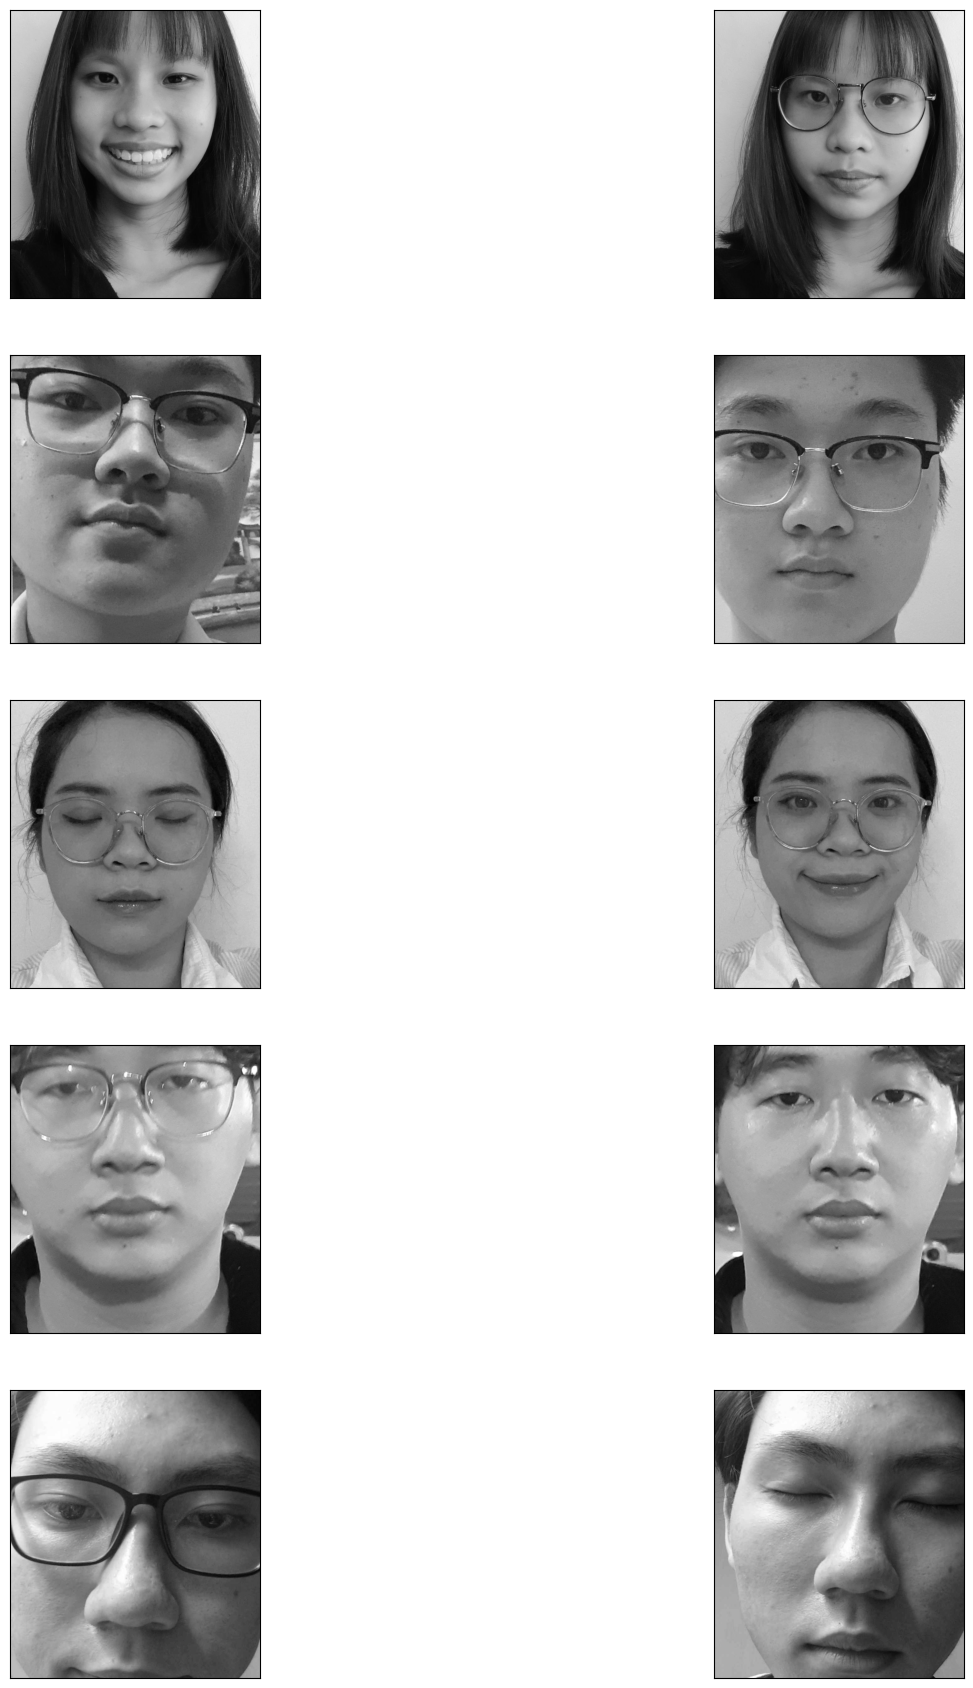

In [5]:
# Initialize an array to store flattened testing images
testing_tensor = np.ndarray(shape=(10, target_height * target_width), dtype=np.float64)

# Create a figure to display the new test images
fig = plt.figure(figsize=(12, 12))

print('Test Images:')
# Loop through each person (s1 and s2)
for i in range(5):
    # Loop through each image of each person (1.jpg and 2.jpg)
    for j in range(2):
        # Path to the current test image
        img_path = os.path.join(dataset_path, 'test', f's{i+1}', f'{j+1}.jpg')
        print(f'Processing image: {img_path}')  # Add debug print statement

        # Check if the file exists
        if not os.path.isfile(img_path):
            print(f'Error: File not found - {img_path}')
            continue

        # Process the image
        img = process_image(img_path, target_width, target_height)

        # Display the current test image
        plt.subplot(5, 2, i * 2 + j + 1)  # Adjust rows and columns based on the number of images
        plt.imshow(img, cmap='gray')
        plt.tick_params(labelleft=False, labelbottom=False, bottom=False, top=False, right=False, left=False, which='both')
        plt.subplots_adjust(right=1.2, top=1.5)  # Adjust subplot parameters for spacing

        # Flatten and store the image data in the testing tensor
        testing_tensor[i * 2 + j, :] = np.array(img, dtype='float64').flatten()

plt.show()


## Mean Calculation and Normalization

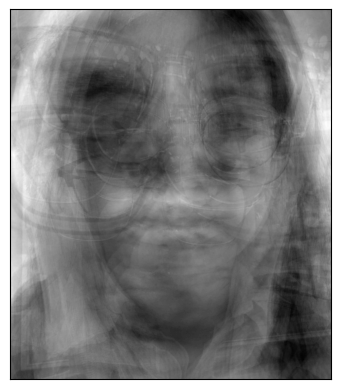

In [6]:
mean_face = np.zeros((1,target_height*target_width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(training_tensor))).flatten()

plt.imshow(mean_face.reshape(target_height, target_width), cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

## Do mean Zero

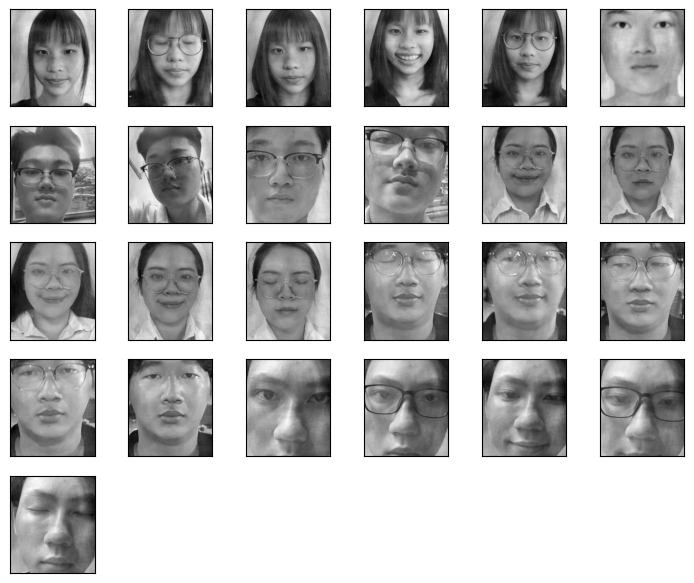

In [7]:
#normalized training set
normalised_training_tensor = np.ndarray(shape=(len(training_tensor), target_height*target_width))

for i in range(len(training_tensor)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

for i in range(len(training_tensor)):
    img = normalised_training_tensor[i].reshape(target_height,target_width)
    plt.subplot(10,6,1+i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

## Covariance Matrix Calculation

In [8]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix, 25.0)
print('Covariance matrix of X:')
print(cov_matrix)

Covariance matrix of X:
[[ 1.38679608e+02  2.62253937e+01  5.59730759e+01 -4.10274310e+00
   3.53043705e+01 -1.52376462e+01  1.12872133e+01  3.93489691e+01
   4.51363621e+00  8.37558092e-01  1.64195732e+01  1.96538622e+01
  -2.46454001e+01  1.86126001e+01  2.50167118e+01 -4.20074275e+01
  -3.99264672e+01 -3.87966023e+01 -3.38168186e+01 -4.07406964e+01
  -2.25124631e+01 -2.29910089e+01 -3.86240843e+01 -2.93860726e+01
  -3.90851417e+01]
 [ 2.62253937e+01  1.32079593e+02  8.07121449e+01  8.01341141e+01
   1.03404628e+02 -1.38109593e+01  4.35246369e+00 -1.97005739e+01
  -3.15648906e+01 -2.04863957e+01 -1.76725484e+01 -2.23042715e+01
  -8.77628297e+00 -2.41250129e+01 -3.16203543e+01  7.29078376e-01
  -1.01046986e+01  3.50412537e+00  6.76262960e+00 -4.64427002e+00
  -3.69129551e+01 -4.50638113e+01 -5.44909403e+01 -4.39738326e+01
  -5.26523724e+01]
 [ 5.59730759e+01  8.07121449e+01  1.22654786e+02  5.58840864e+01
   8.28173944e+01 -2.25642757e+01  1.53185819e+01 -7.66253464e+00
  -3.33671975e

## Eigenvalues and Eigenvectors Calculation

In [9]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X):')
print(eigenvectors)
print('Eigenvalues of Cov(X):',eigenvalues)

Eigenvectors of Cov(X):
[[ 1.92195287e-01  1.57480217e-01 -1.75009421e-01 -3.01413934e-01
   1.87186172e-01 -5.94659428e-01  3.16474221e-02 -2.95797391e-01
  -1.28844042e-01 -1.89565204e-01 -2.00000000e-01  2.50909968e-01
  -2.94210733e-01  2.01144559e-01  1.23636308e-01  3.97419418e-04
   1.65572191e-01 -8.13118841e-02 -2.60702012e-02  3.57349214e-02
  -4.53964718e-02 -4.39080599e-02  1.11463519e-02  4.04742622e-02
  -9.78851948e-03]
 [ 2.64823556e-01 -1.81322772e-01 -3.06223187e-01 -1.40775802e-02
  -1.30405803e-01  5.63455510e-02 -2.64936160e-02 -4.61122123e-02
   7.61319679e-02  3.76154522e-01 -2.00000000e-01 -1.58740442e-01
   2.43134607e-01 -8.18673860e-02  4.33586671e-01 -3.44453575e-03
   3.37640133e-01 -3.40492745e-01  9.84808027e-02 -1.42382366e-01
  -1.73553193e-02 -6.59414783e-02 -1.93262635e-01  4.56547815e-02
  -9.85216178e-02]
 [ 2.28892656e-01 -9.22444408e-02 -3.35367768e-01 -1.53537449e-01
   1.44318628e-01 -1.11751420e-01 -5.56813016e-02  1.29228958e-02
  -3.00455828e

## Determine Number of Components for Variance Retention

Cumulative proportion of variance explained vector: [0.24043449 0.44701548 0.58158492 0.66716861 0.71768539 0.75848339
 0.79031652 0.82027278 0.84671805 0.86817975 0.88514559 0.90075718
 0.91620384 0.92826606 0.93917264 0.94920763 0.95731393 0.96536773
 0.97241741 0.97935055 0.98554778 0.9916321  0.99681091 1.
 1.        ]


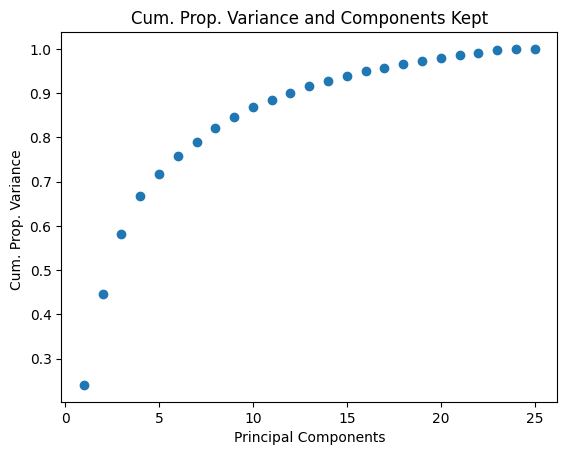

In [10]:
# get corresponding eigenvectors to eigen values
# so as to get the eigenvectors at the same corresponding index to eigen values when sorted
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Find cumulative variance of each principle component
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector:", var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance ')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [11]:
# Determine the number of components needed to retain at least 91% variance
threshold = 0.8
num_components = np.argmax(var_comp_sum >= threshold) + 1

# Display cumulative proportion of variance explained
print("Cumulative proportion of variance explained vector:", var_comp_sum)
print('Number of eigen vectors:',len(eigvalues_sort))

print(f"Number of components chosen to retain {threshold * 100}% variance: {num_components}")
reduced_data = np.array(eigvectors_sort[:num_components]).transpose()

Cumulative proportion of variance explained vector: [0.24043449 0.44701548 0.58158492 0.66716861 0.71768539 0.75848339
 0.79031652 0.82027278 0.84671805 0.86817975 0.88514559 0.90075718
 0.91620384 0.92826606 0.93917264 0.94920763 0.95731393 0.96536773
 0.97241741 0.97935055 0.98554778 0.9916321  0.99681091 1.
 1.        ]
Number of eigen vectors: 25
Number of components chosen to retain 80.0% variance: 8


## Calculate Eigenfaces and Project Training Data

In [12]:
# Select the top eigenvectors based on the number of components determined
reduced_data = np.array(eigvectors_sort[:num_components]).transpose()

# Project the normalized training data onto the eigenfaces
proj_data = np.dot(training_tensor.transpose(), reduced_data)
proj_data = proj_data.transpose()

## Eigenfaces

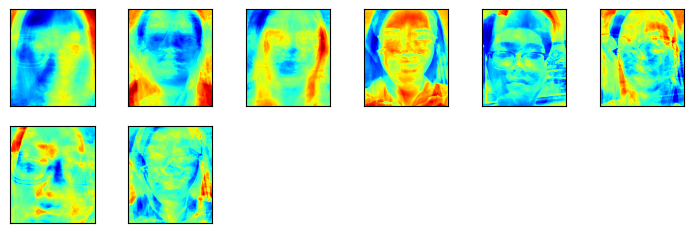

(8, 736000)

In [13]:
# get projected data ---> eigen space

proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

# plotting of eigen faces --> the information retained after applying lossing transformation
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(target_height,target_width)
    plt.subplot(10,6,1+i)
    plt.imshow(img, cmap='jet')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

proj_data.shape

## Signature of Each Face

In [14]:
print(normalised_training_tensor.shape)
print(proj_data.shape)

w = np.array([np.dot(proj_data,img) for img in normalised_training_tensor])
w.shape

(25, 736000)
(8, 736000)


(25, 8)

## Face Recognition

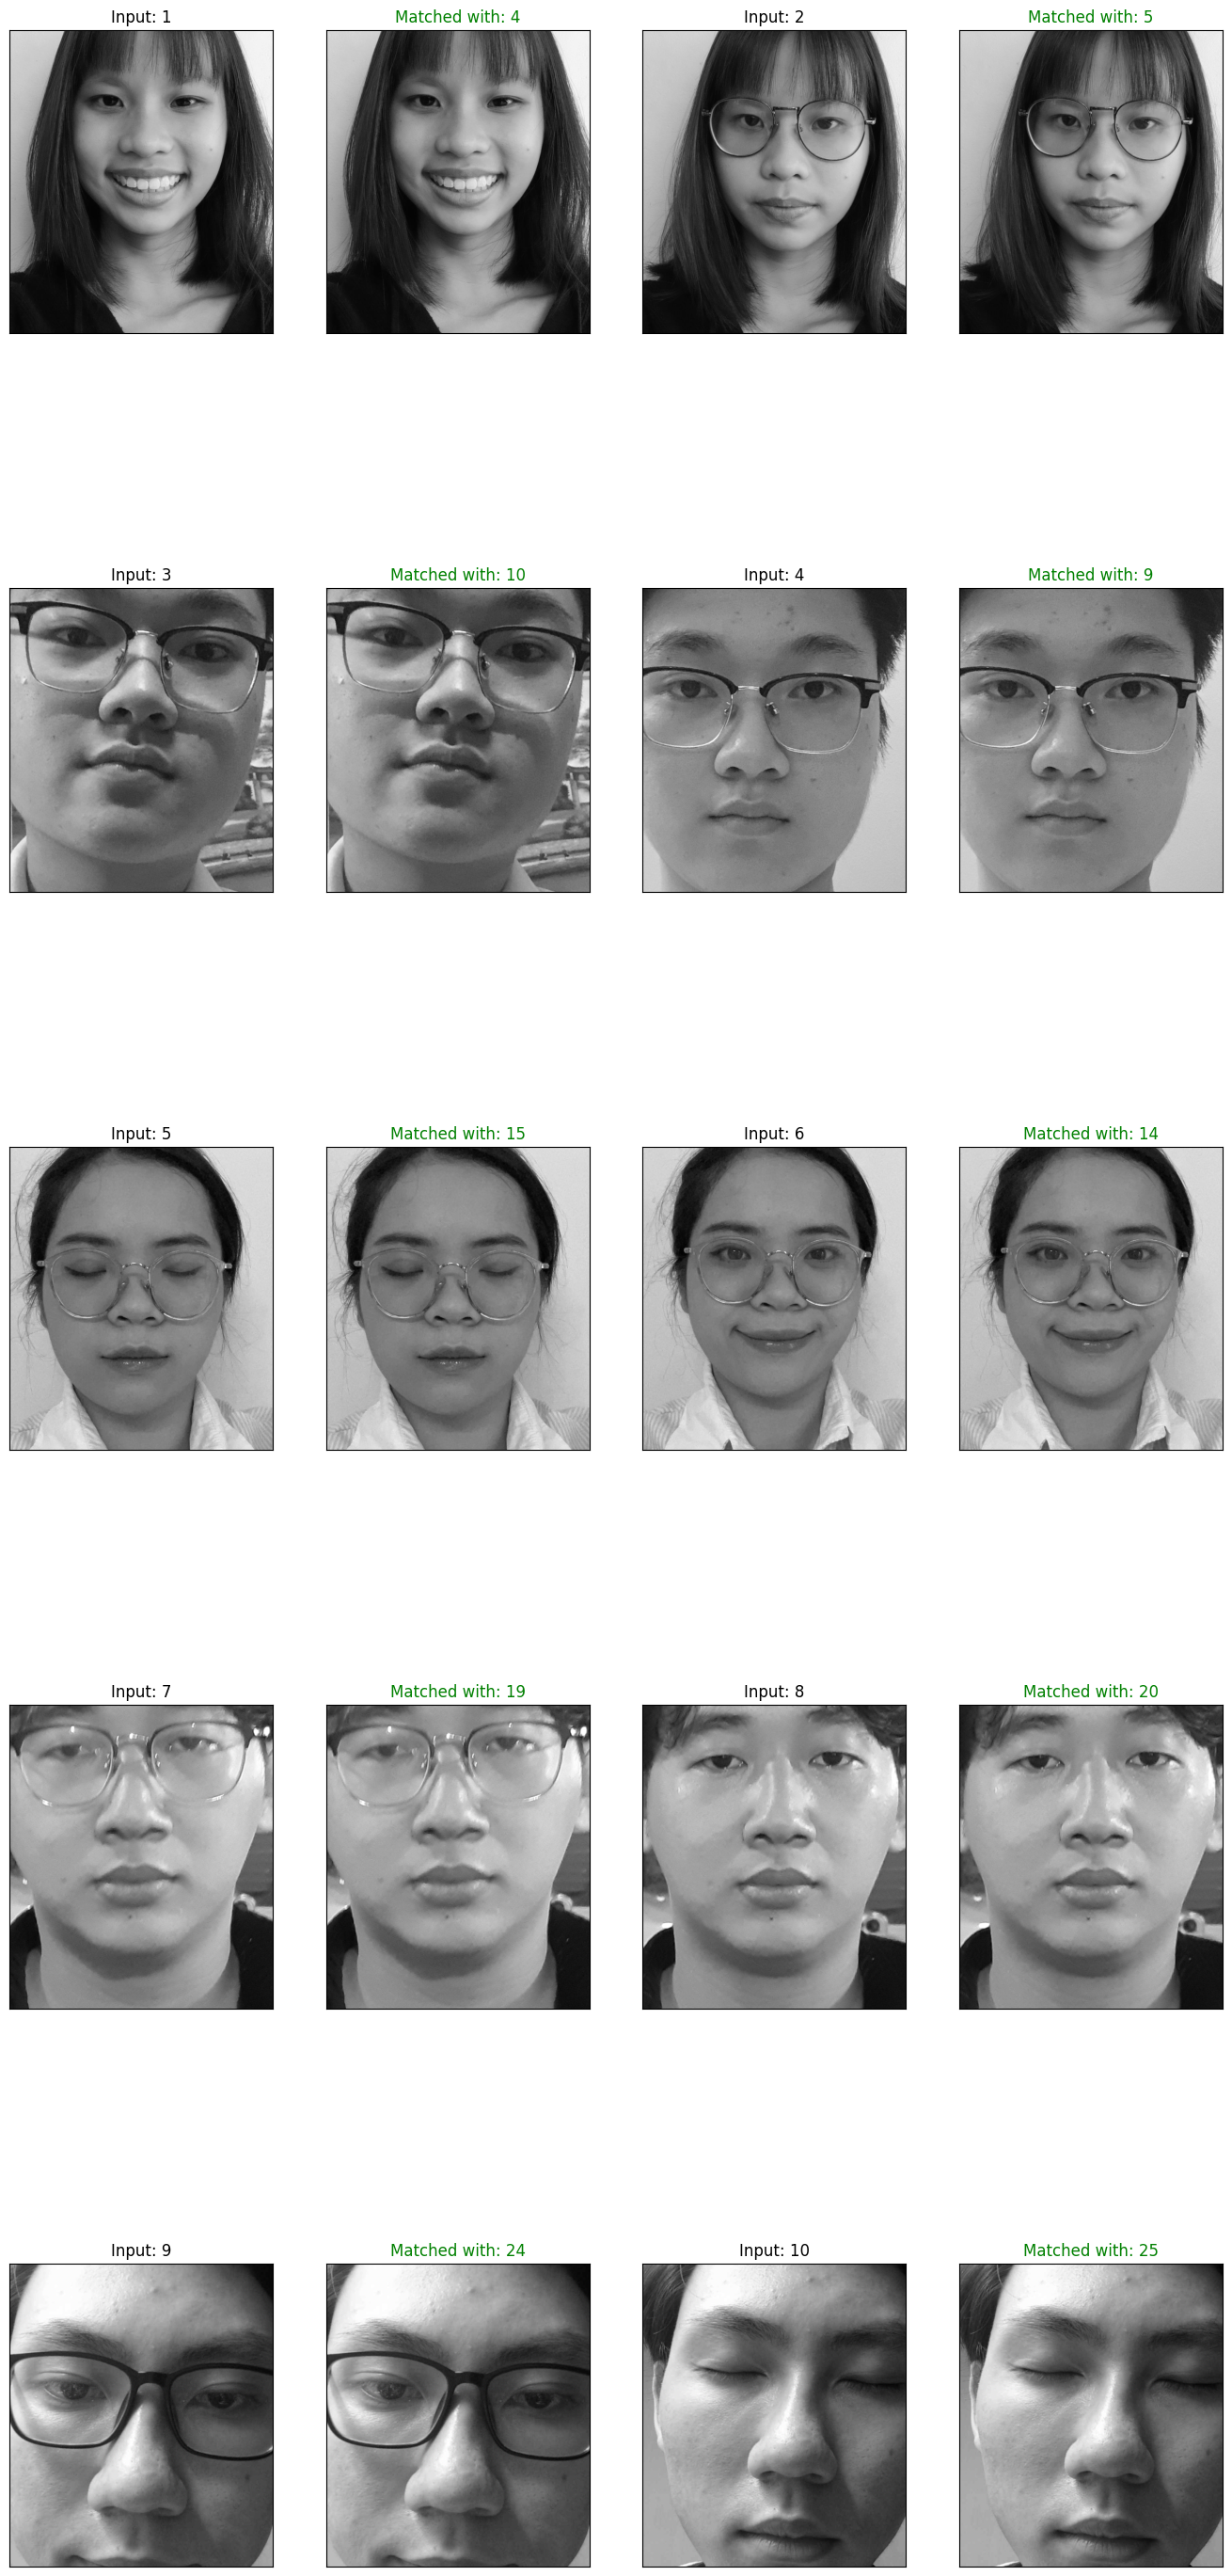

Correct predictions: 10/10 = 100.00%


In [15]:
count = 0
num_images = 0
correct_pred = 0

def recogniser(img_number, proj_data, w):
    global count, num_images, correct_pred

    num_images += 1
    unknown_face_vector = testing_tensor[img_number, :]
    normalised_uface_vector = np.subtract(unknown_face_vector, mean_face)

    plt.subplot(5, 4, 1 + count)
    plt.imshow(unknown_face_vector.reshape(target_height, target_width), cmap='gray')
    plt.title('Input: ' + str(img_number + 1))
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False, top=False, right=False, left=False, which='both')
    count += 1

    w_unknown = np.dot(proj_data, normalised_uface_vector)  # Projected test face
    diff = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)

    plt.subplot(5, 4, 1 + count)

    set_number = int(img_number / 2)

    t0 = 15000000

    if norms[index] < t0:
        if index >= (5 * set_number) and index < (5 * (set_number + 1)):
            plt.title('Matched with: ' + str(index + 1), color='g')
            plt.imshow(training_tensor[index, :].reshape(target_height, target_width), cmap='gray')
            correct_pred += 1
        else:
            plt.title('Matched with: ' + str(index + 1), color='r')
            plt.imshow(training_tensor[index, :].reshape(target_height, target_width), cmap='gray')
    else:
        if img_number >= 10:
            plt.title('Unknown face!', color='g')
            correct_pred += 1
        else:
            plt.title('Unknown face!', color='r')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False, top=False, right=False, left=False, which='both')
    count += 1

fig = plt.figure(figsize=(12, 12))
for i in range(len(testing_tensor)):
    recogniser(i, proj_data, w)

plt.show()

print('Correct predictions: {}/{} = {:.2f}%'.format(correct_pred, num_images, correct_pred / num_images * 100.00))


## Plotting of Accuracy vs k-value for eigenvectors

Total Number of eigenvectors: 25


Text(0.5, 1.0, 'Accuracy vs. k-value')

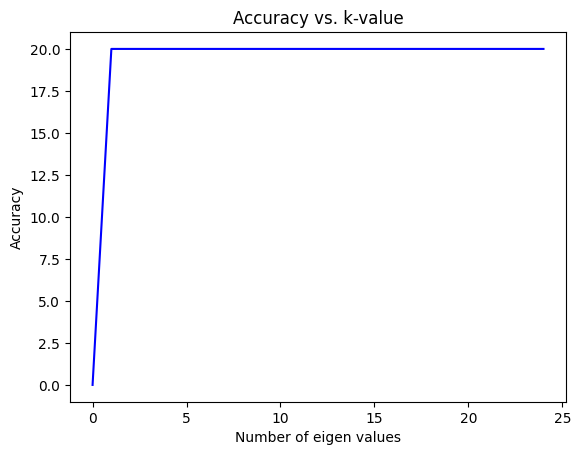

In [16]:
accuracy = np.zeros(len(eigvalues_sort))

def tester(img_number,proj_data,w,num_images,correct_pred):

    num_images          += 1
    unknown_face_vector = testing_tensor[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)

    set_number = int(img_number/4)

    t0 = 15000000

    if norms[index] < t0:
        if(index>=(6*set_number) and index<(6*(set_number+1))):
            correct_pred += 1
    else:
        if(img_number>=40):
            correct_pred += 1

    return num_images,correct_pred

def calculate(k):

    reduced_data = np.array(eigvectors_sort[:k]).transpose()

    proj_data = np.dot(training_tensor.transpose(),reduced_data)
    proj_data = proj_data.transpose()

    w = np.array([np.dot(proj_data,img) for img in normalised_training_tensor])

    num_images=0
    correct_pred=0

    for i in range(len(testing_tensor)):
        num_images,correct_pred = tester(i,proj_data,w,num_images,correct_pred)

    accuracy[k] = correct_pred/num_images*100.00

print('Total Number of eigenvectors:',len(eigvalues_sort))
for i in range(1,len(eigvalues_sort)):
    calculate(i)

fig, axi = plt.subplots()
axi.plot(np.arange(len(eigvalues_sort)), accuracy, 'b')
axi.set_xlabel('Number of eigen values')
axi.set_ylabel('Accuracy')
axi.set_title('Accuracy vs. k-value')

### Nhận xét:

- Kết quả nhận diện khá tốt với bộ ảnh của các thành viên nhóm em như phía trên. Tuy nhiên:
1. Do một số yếu tố nên chất lượng các ảnh không được đồng đều giữa các thành viên. Nên có thể ảnh hưởng đến chất lượng của việc sử dụng PCA cho nhận diện khuôn mặt
2. Do số lượng data ảnh còn khá ít, nên khả năng nhận diện chưa tốt với các ảnh khác
3. Để cải thiện việc nhận diện cũng như nhận diện các khuôn mặt được tốt hơn:
  - Cần thêm lượng lớn số lượng ảnh và số lượng người tham gia vào bộ datasets training để giúp PCA nhận diện tốt các đặc trưng.
  - Các bức ảnh nên được chụp với nền đồng nhất giúp nổi bật khuôn mặt. Từ đó, giúp có thể nhận diện các đặc trung tốt hơn.